# DESAFIO CIENTISTA DE DADOS - INDICIUM

Participante: João Pedro Coelho Barbosa

### Nesse desafio vamos explorar de forma analítica um **Dataset** constando dados acerca da produção, faturamento e avaliação de filmes no IMDB

---

Abaixo, temos o dicionário de dados da base utilizada no estudo e modelagem

| Variável | Descrição |
| :--- | :--- |
| **Series_Title** | Nome do filme |
| **Released_Year** | Ano de lançamento |
| **Certificate** | Classificação etária |
| **Runtime** | Tempo de duração |
| **Genre** | Gênero |
| **IMDB_Rating** | Nota do IMDB |
| **Overview** | Overview do filme |
| **Meta_score** | Média ponderada de todas as críticas |
| **Director** | Diretor |
| **Star1** | Ator/atriz #1 |
| **Star2** | Ator/atriz #2 |
| **Star3** | Ator/atriz #3 |
| **Star4** | Ator/atriz #4 |
| **No_of_Votes** | Número de votos |
| **Gross** | Faturamento |

### Principais desafios encontrados na EDA:
1. Tratamento de dados faltantes:
- Nota-se ao longo do **Notebook** que existem 4 colunas ao longo do **Dataset** com dados faltantes, sendo elas:
    - Released_Year: 1 dado faltante - variável numérica.
    - Certificate: 101 dados faltantes - variável categórica.
    - Meta_score: 157 dados faltantes - variável numérica.
    - Gross: 169 dados faltantes - variável numérica.
    - Total dee 287 dados faltantes, visto que algumas linhas apresentam mais de uma coluna com dado nulo

- Entretanto, diferentemente da maioria dos **Datasets** geralmente encontrados no Kaggle, como datasets de churn ou housing prices
tais valores costumam ser imputados através de técnicas estatísticas conhecidas:
    - Mediana dos valores para variáveis numéricas.
    - Moda dos valores para variáveis categóricas.

- Ademais, para esse tipo de **Dataset**, imputar ou adicionar valores de forma não-analítica geraria dados enviesados e, em sua grande maioria, falsos, já que dados como a coluna `Gross` poderia afetar no faturamento imputado de um filme antigo, onde a curva de tendência do faturamento de filmes cresceu num ritmo quase que exponencial e de certo modo, afeta a mediana global da base. 

- A saída principal enxergada foi ir atrás de bases ou APIs que pudessem ajudar a preencher alguma parte desses dados:
    - API do próprio IMDB:
        > Seria preciso acessar com a conta da AWS (Visto que o IMDB é da Amazon) e ativar o `AWS Cost Explorer` visando monitorar o **cost and usage**, fora um série de outros fatores que poderaram a favor de buscar uma outra alternativa
    - API do OMDB:
        > Por sua vez, uma API gratuita até 1000 requisições, acima disso necessitaria de uma colaboração no Patreon. Todavia, só seriam necessárias 287 requisições e algumas de teste com foco em validar e entender o funcionamento da API
    - Com isso, foi-se utilizada a **API do OMDB**, com foco em visando mitigar a falta de dados.
        > _Mais detalhes acerca do processo ao longo do Notebook_.

2. Correlação das `features` com a `target`:
- Ao longo do **Notebook** veremos a elaboração de gráficos e matrizes de correlação visando entender o peso das colunas e dados específicos no `IMDB_Rating`

    - Boxplots, Histogramas, Séries temporais (buscando entender a tendência ou até mesmo certa sazonalidade em alguns dados) e heatmap de correlação da features numéricas com o `IMDB_Rating`

### Perguntas do tópicos 2:
- a.	Qual filme você recomendaria para uma pessoa que você não conhece?
    - Com foco em responder essa pergunta, foi-se elaborada uma função buscando reunir informações que fossem relevantes para se indicar um bom filme. Essa função é a `recomendacao_de_filme()` presente nas últimas células do **Notebook**.
        - Ela se baseia numa lógica de operações booleanas onde primeiramente foi-se levantado variáveis importantes para a classificação geral de bons filmes, onde foi-se ponderado 3 principais variáveis para essa classificação:
        `No_of_Votes`, `IMDB_Rating` e `Meta_score`
        - Com essas 3 variáveis foi-se feita uma análise estatística de seus quartis, selecionando somente os filme presentes no 3º quartil com foco em pegar aqueles 25% melhores filmes em cada uma dessas métricas, em seguida, operadores booleanos `&` ou `AND` atuaram com foco em garantir que todos os filmes filtrados pertençam ao 3º quartil de cada uma dessas métricas.
        - E assim, seleciona-se 5 filmes aleatórios dentro dessa gama seleta de filmes para recomendar para a pessoa

- b.    Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
    - Através da análise exploratória e matriz de correlação pode-se elencar algumas principais variáveis que tem direta correlação com o faturamento de um filme:
        - O gênero atribuido a variável `Genre` (Que "sofreu" alguma manipulações ao longo da EDA e da modelagem) ao qual o filme se encaixa:
            - Com o top 5 sendo encabeçados por `Adventure`, `Sci-Fi`, `Action`, `Animation` e `Fantasy`
        - `No_of_Votes` é outra variável que apresenta um correlação forte com o faturamento e de forma até que previsível, já que a mesma funciona como um indicativo para a popularidade do filme
        - E `Released_Year` que também apresenta uma correalão com o faturamento, mais fraca que número de votos, entretanto a série histórica plotada posteriormente mostra o comportamento da curva de faturamento médio anual por filmes da base

- c.	Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
    - Para a coluna `Overview` a primeira ideia em mente foi a elaboração de uma nuvem de palavras utilizando a biblioteca `wordcloud`, tratando e padronizando o conjunto de sinopses da coluna e identificando stopwords para termos uma nuvem limpa e que reflete de fato nas palavras importantes que mais se repetem na coluna
    - Essa estratégia focou tanto em tentar identificar padrões linguísticos em sinopses com foco em buscar entender se estas refletiriam, de forma clara, no tema dos filmes quanto em tentar trazer uma abordagem generalista acerca dos termos mais citados e comuns nas sinopses dos filmes dispostos na base
        - Alguns insights extraídos da nuvem de palavra:
            - **Life:** Indica uma clara tendência de filmes em retratar a vida das pessoas
            - **Two:** Interessante aparição onde pode ser interpretada como uma dominância de narrativas com dois personagens principais
            - **Man e Woman:** Reflete no enviesamento de filmes, _pelo menos nesta base_, em preferir ou escolher por centralizar o homem como ponto focal de narrativas ao invés de mulheres
            - **Family:** Primeira palavra interessante que ajuda a responder uma das perguntas do tópico c., onde vemos que sim, de certo modo, podemos utilizar de técnicas de processamento linguagem natural ou até mesmo RAG para buscar inferir temas de filmes através de sua sinopse. Ademais, seria interessante buscar analisar e entender a acurária que essas técnicas teriam nesse tipo de aplicação
    - Com foco em buscar explorar mais insights dessa abordagem, também realizou-se a plotagem de um gráfico de barras com as palavras (acima de 2 caracteres) com maior frequência de aparecimento dentro da base - Uma forma de avaliar numericamente a abordagem inicial feita com nuvem de palavras - e nela conseguimos atestar com mais veemência tais insights extraídos, onde tópicos como **Family, War, Love, Find** podem ajudar a inferir com grande probabilidade os gênero acerca desses filmes.
    - Então, sim, é possível inferir o gênero de filmes apartir da coluna `Overview`, todavia, seria interessante abordar um estudo acerca da acurácia e outras métricas de validação desse recurso aplicado a este tipo de aplicação

## 1. Importação de bibliotecas e utilitários

Este trecho de código importa bibliotecas, configurações e variáveis necessárias para a análise exploratória e processamento de dados.

| Biblioteca | Função principal |
|------------|-----------------|
| **pandas** | Manipulação de dados em DataFrames |
| **matplotlib.pyplot** | Visualizações gráficas básicas |
| **seaborn** | Visualizações estatísticas mais elaboradas |
| **numpy** | Operações matemáticas e vetoriais |
| **requests** | Requisições HTTP para APIs |
| **os** | Acesso ao sistema operacional (ex.: variáveis de ambiente, caminhos) |
| **dotenv** | Carregar variáveis armazenadas no arquivo `.env` |
| **time** | Funções relacionadas a tempo (ex.: delays) |
| **warnings** | Controle/exclusão de mensagens de aviso |
| **wordcloud** | Geração de nuvens de palavras |
| **nltk** | Processamento de linguagem natural (ex.: stopwords) |
| **re** | Expressões regulares para limpeza de texto |
| **collections.Counter** | Contagem de elementos (ex.: palavras) |
| **sys** | Módulo local para configuração do path da pasta **/src** |
| **src.eda_utils** | Arquivo de utilidades utilizado na EDA e na modelagem |


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
import os
import dotenv
import time
import warnings
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from collections import Counter

import sys
sys.path.append("..") 
from src.eda_utils import conv_numerico

# Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Ignorando warnings
warnings.filterwarnings('ignore')

# Carregando variáveis de ambiente
dotenv.load_dotenv()
OMDB_API_KEY = os.getenv('OMDB_API_KEY')


[nltk_data] Downloading package stopwords to C:\Users\USUARIO.SD-
[nltk_data]     SMR-P3-06\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Definindo o path e realizando a ingestão da base no script

- Definindo o path do arquivo na pasta **/raw** buscando seguir as boas práticas de organização de diretórios
- Leitura do **.csv** e conversão para um dataframe utilizando pandas
- Visualização inicial de 3 amostras da base


In [6]:
path = "../data/raw/desafio_indicium_imdb.csv"
df = pd.read_csv(path)
df.head(3)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


## 3. Extraindo informações iniciais do Dataframe
- Informações acerca da quantidade de linhas e colunas do Dataframe e do tipo de variável presente em cada coluna

In [7]:
# Verificando o tamanho do Dataframe
print(f"Linhas do DataFrame: {df.shape[0]}\nColunas do DataFrame: {df.shape[1]}\n")

# Verificando os tipos de dados do Dataframe
print(df.info())

Linhas do DataFrame: 999
Colunas do DataFrame: 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usag

## 4. Primeiras manipulações e tratamentos da base
- Criando uma cópia do dataframe para manipulação e 'checkpoints' de alterações da base
- Utilizando a função `conv_numerico` presente em `src.eda_utils` para conversão das variáveis **'Released_Year', 'Runtime' e 'Gross'** do tipo object para numérico - `int64` ou `float64` a depender da variável
- Verificando se as mudanças ocorreram com êxito utilizando `.info()`

In [8]:
# Criando uma cópia do Dataframe para manipulação e boas práticas
df_copy = df.copy()

# Transformando 'Released_Year', 'Runtime' e 'Gross' em variáveis numéricas
df_copy = conv_numerico(df_copy)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    Int64  
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    Int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: Int64(2), float64(3), int64(2), object(9)
memory usage: 127.0+ KB


## 5. Avaliando a distribuição das variáveis numéricas e categóricas

In [9]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,500.0,288.530761,1.0,250.5,500.0,749.5,999.0
Released_Year,998.0,1991.214429,23.308539,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime,999.0,122.871872,28.101227,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,999.0,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0
Gross,830.0,68082574.104819,109807553.385723,1305.0,3245338.5,23457439.5,80876340.25,936662225.0


In [10]:
df_copy.describe(include='object').T

,count,unique,top,freq
Series_Title,999,998,Drishyam,2
Certificate,898,16,U,234
Genre,999,202,Drama,84
Overview,999,999,An organized crime dynasty's aging patriarch t...,1
Director,999,548,Alfred Hitchcock,14
Star1,999,659,Tom Hanks,12
Star2,999,840,Emma Watson,7
Star3,999,890,Rupert Grint,5
Star4,999,938,Michael Caine,4


## 6. Verificação de valores nulos e duplicados
- Somando a quantidade de valores nulos e duplicados por coluna no dataframe

In [12]:
# Verificando valores nulos e duplicados
print(f"Valores nulos:\n{df_copy.isnull().sum()}\n")
print(f"Número de linhas duplicadas: {df_copy.duplicated().sum()}\n")

Valores nulos:
Unnamed: 0         0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Número de linhas duplicadas: 0



## 7. Verificando mais a fundo os valores nulos
- Verificando a quantidade de linhas do dataframe que apresenta pelo menos uma coluna com valor nulo

In [13]:
# Colunas com valores nulos
col_nulos = ['Released_Year', 'Certificate', 'Meta_score', 'Gross']

# Criando um dataframe com o nome de todos os filmes que apresentam algum valor nulo nas colunas 'Released_Year', 'Certificate', 'Meta_score' e 'Gross'
df_nulos = df_copy[df_copy[col_nulos].isnull().any(axis=1)].copy()

print(f"Número de filmes com valores nulos em pelo menos uma das colunas {col_nulos}: {df_nulos.shape[0]}\nRepresentando {df_nulos.shape[0] / df_copy.shape[0] * 100:.2f}% do total de filmes.\n")

Número de filmes com valores nulos em pelo menos uma das colunas ['Released_Year', 'Certificate', 'Meta_score', 'Gross']: 287
Representando 28.73% do total de filmes.



## 8. Requisição de dados da API do OMDB
- Com foco em preencher esses valores nulos com os dados reais de cada filmes - evitando imputação por moda e mediana - foi-se elaborado uma estrutura de requisição dos dados faltantes com foco em preencher o máximo de nulos possível
    - A chave da API está presente no arquivo `.env`
    - Para solicitar uma chave de API no OMDB é preciso registrar rapidamente o email no site [OMDB API Key](https://www.omdbapi.com/apikey.aspx) e selecionar o Account Type como FREE! (1,000 daily limit)
    - Em seguida um email com a chave da API será enviado e chegará o seguinte link
    > http://www.omdbapi.com/?i=tt3896198&apikey={SUA_CHAVE_API}
    - Após isso é só copiar o campo presente em que sua chave se encontra e substituir no arquivo .env
    - Lembre-se também de clicar na URL abaixo do link da sua chave de API para que o OMDB torne sua chave ativa

- São feitas requisições na API do OMDB com foco em mapear e buscar exatamente dados acerca dos filmes com colunas nulas e retornar somente essas colunas juntamente com o nome do filme - com foco em realizar um `.fillna()` mapeado 
- Ao fim do processo, o arquivo retornado pelas requisições será salvo em `../data/processed/dados_omdb.csv`
- Importante notar que o OMDB também não apresenta todos os dados acerca de todos os filmes, porém ajudará a reduzir a quantidade de nulos da base principal

In [15]:
# Função de busca do filmes com valores nulos na API do OMDB
def buscar_dados_omdb(titulo):
    url = "http://www.omdbapi.com/"
    params = {
        "apikey": OMDB_API_KEY,
        "t": titulo,
    }
    
    r = requests.get(url, params=params, timeout=5)
    data = r.json()
    if data.get("Response") == "True":
        return {
            "Series_Title": data.get("Title"),
            "Released_Year": data.get("Year"),
            "Certificate": data.get("Rated"),
            "Meta_score": data.get("Metascore"),
            "Gross": data.get("BoxOffice")
            }
    return None

# Criando um loop para preencher os valores nulos de 'Released_Year', 'Certificate', 'Meta_score' e 'Gross' utilizando os dados da API do OMDB
filmes = []
for i, linha in enumerate(df_nulos.itertuples(), 1):
    dados_filme = buscar_dados_omdb(linha.Series_Title)
    if dados_filme:
        filmes.append(dados_filme)

    # Contador de progresso
    print(f"Filme {i}/{df_nulos.shape[0]} processado: {linha.Series_Title}")
    time.sleep(1) # Com timesleep de 1 segundo, o tempo total fica em torno de 6 minutos - Talvez seja interessante diminuir ou retirar o sleep

# Verificando quantos filmes foram encontrados na API do OMDB
print(f"Filmes encontrados na API: {len(filmes)} / {len(df_nulos)}")

df_omdb = pd.DataFrame(filmes)
print(df_omdb.head())

df_omdb.to_csv(r'../data/processed/dados_omdb.csv', index=False)

Filme 1/287 processado: Hamilton
Filme 2/287 processado: Soorarai Pottru
Filme 3/287 processado: Seppuku
Filme 4/287 processado: It's a Wonderful Life
Filme 5/287 processado: Hotaru no haka
Filme 6/287 processado: Ayla: The Daughter of War
Filme 7/287 processado: Vikram Vedha
Filme 8/287 processado: Dangal
Filme 9/287 processado: Taare Zameen Par
Filme 10/287 processado: Once Upon a Time in America
Filme 11/287 processado: Anand
Filme 12/287 processado: Tengoku to jigoku
Filme 13/287 processado: Witness for the Prosecution
Filme 14/287 processado: Paths of Glory
Filme 15/287 processado: Sunset Blvd.
Filme 16/287 processado: The Great Dictator
Filme 17/287 processado: Tumbbad
Filme 18/287 processado: Andhadhun
Filme 19/287 processado: Drishyam
Filme 20/287 processado: Miracle in cell NO.7
Filme 21/287 processado: Babam ve Oglum
Filme 22/287 processado: Idi i smotri
Filme 23/287 processado: Ikiru
Filme 24/287 processado: Ladri di biciclette
Filme 25/287 processado: M - Eine Stadt sucht e

## 8. Importando a nova base de dados processados via API do OMDB
- Importando via `pandas` e verificando as informações e tipos de variáveis de suas colunas

In [14]:
df_fillna = pd.read_csv(r'../data/processed/dados_omdb.csv')
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   231 non-null    object 
 1   Released_Year  231 non-null    object 
 2   Certificate    192 non-null    object 
 3   Meta_score     112 non-null    float64
 4   Gross          93 non-null     object 
dtypes: float64(1), object(4)
memory usage: 9.2+ KB


## 9. Verificando o shape - quantidade de linhas e colunas do novo dataframe
- Com foco em saber quantos dos 287 filmes foram encontrados na base do OMDB
    - No caso, 231 filmes

In [15]:
# Linhas e colunas do novo Dataframe
print(f"Linhas do DataFrame: {df_fillna.shape[0]}\nColunas do DataFrame: {df_fillna.shape[1]}\n")

Linhas do DataFrame: 231
Colunas do DataFrame: 5



## 10. Tratando os dados da nova base
- Convertendo individualmente cada coluna para numérico
- Importante notar que `Gross` veio num formato diferente da base principal, tornando necessário a padronização

In [16]:
# Tratando a coluna 'Released_Year', 'Meta_score' e 'Gross' para o formato numérico
df_fillna['Released_Year'] = pd.to_numeric(df_fillna['Released_Year'], errors='coerce')
df_fillna['Released_Year'] = df_fillna['Released_Year'].astype('Int64')
df_fillna['Meta_score'] = pd.to_numeric(df_fillna['Meta_score'], errors='coerce')

df_fillna['Gross'] = df_fillna['Gross'].replace('N/A', np.nan)
df_fillna['Gross'] = df_fillna['Gross'].str.replace('$', '').str.replace(',', '').astype('float64')

df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   231 non-null    object 
 1   Released_Year  227 non-null    Int64  
 2   Certificate    192 non-null    object 
 3   Meta_score     112 non-null    float64
 4   Gross          93 non-null     float64
dtypes: Int64(1), float64(2), object(2)
memory usage: 9.4+ KB


## 11. Verificando a quantidade de nulos na nova base
-  Visto que, a base do OMDB também apresenta valores nulos coincidentes para filmes presentes na base principal

In [33]:
df_fillna.isna().sum()

Series_Title       0
Released_Year      4
Certificate       39
Meta_score       119
Gross            138
key                0
dtype: int64

## 12. Preenchendo valores nulos na base principal utilizando a base do OMDB
- Criação de uma chave Nome do filme + '_' + Ano de lançamento, visto que na base apresenta filmes com nomes iguais e isso interferiria no processo de mapeamento para preenchimento de dados nulos
- Transformação de `df_fillna` em dict com foco em criar e facilitar o mapping para preenchimento de dados nulos
- Criação de um novo dataframe `df_clean` com os dados nulos devidamente preenchidos e drop da coluna `key`, já que não é mais necessária no dataframe

In [19]:
# Colunas que queremos preencher
col_nulos = ['Certificate', 'Released_Year', 'Meta_score', 'Gross']

# Criar chave única em ambos os dataframes
df_copy['key'] = df_copy['Series_Title'].astype(str) + '_' + df_copy['Released_Year'].astype(str)
df_fillna['key'] = df_fillna['Series_Title'].astype(str) + '_' + df_fillna['Released_Year'].astype(str)

# Transformar df_fillna em um dicionário por coluna
fillna_dict = {col: df_fillna.set_index('key')[col].to_dict() for col in col_nulos}

# Criar df_clean preenchendo apenas valores nulos
df_clean = df_copy.copy()
for col in col_nulos:
    df_clean[col] = df_clean.apply(
        lambda row: fillna_dict[col].get(row['key'], row[col]) if pd.isnull(row[col]) else row[col], axis=1
    )

# Remover chave temporária
df_clean.drop(columns=['key'], inplace=True)

# Conferir quantos nulos ainda restam
print(df_clean[col_nulos].isnull().sum())

df_nulos_clean = df_clean[df_clean[col_nulos].isnull().any(axis=1)].copy()

print(f"\nNúmero de filmes com valores nulos em pelo menos uma das colunas {col_nulos}: {df_nulos_clean.shape[0]}\nRepresentando {df_nulos_clean.shape[0] / df_copy.shape[0] * 100:.2f}% do total de filmes.\n")


Certificate       55
Released_Year      1
Meta_score       139
Gross            146
dtype: int64

Número de filmes com valores nulos em pelo menos uma das colunas ['Certificate', 'Released_Year', 'Meta_score', 'Gross']: 236
Representando 23.62% do total de filmes.



## 13. Verificando o shape e a quantidade de nulos existente após o tratamento
- Drop das colunas que ainda apresentam algum dado nulo
- Verificação do novo shape após o drop

In [20]:
# Dropando linhas com valores nulos restantes
df_clean = df_copy.dropna(subset=col_nulos)

# Conferindo quantos nulos ainda restam
print(df_clean[col_nulos].isnull().sum())

# Shape do DataFrame final
print(f"Linhas do DataFrame: {df_clean.shape[0]}\nColunas do DataFrame: {df_clean.shape[1]}\n")

df_clean.head()

Certificate      0
Released_Year    0
Meta_score       0
Gross            0
dtype: int64
Linhas do DataFrame: 712
Colunas do DataFrame: 17



,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,key
0,1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,The Godfather_1972
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,The Dark Knight_2008
2,3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,The Godfather: Part II_1974
3,4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,12 Angry Men_1957
4,5,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,The Lord of the Rings: The Return of the King_...


# Início do processo de visualização de dados

## 1. Histograma de filmes ao longo dos anos
- Vemos uma presença muito maior de filmes mais recentes na base principal

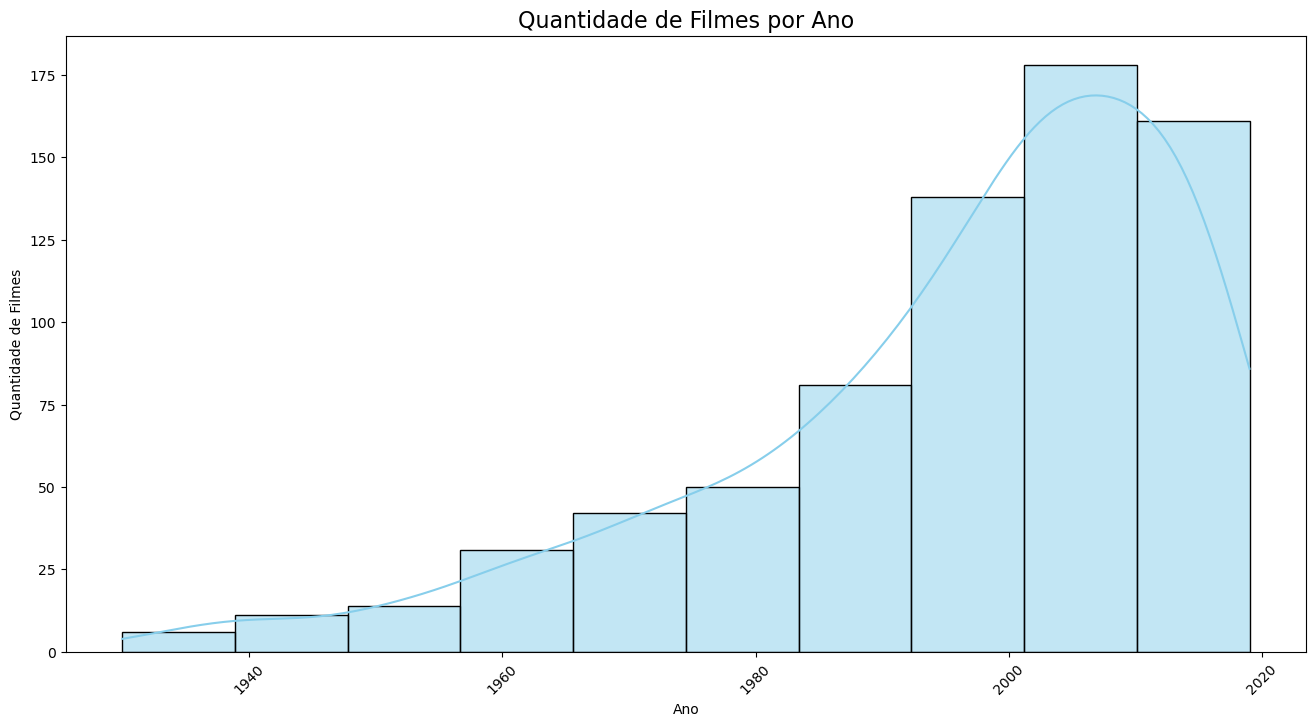

In [46]:
# Quantidade de filmes por ano
plt.figure(figsize=(16,8))
sns.histplot(df_clean['Released_Year'],bins=10, kde=True, color="skyblue")
plt.xticks(rotation=45)  # rotaciona os anos para melhor visualização
plt.title("Quantidade de Filmes por Ano", fontsize=16)
plt.xlabel("Ano")
plt.ylabel("Quantidade de Filmes")
plt.show()


## 2. Séries temporais do faturamento e número de votos ao longos dos anos
- Elaboração de séries temporais acerca da média anual de faturamento e do número de votos por filme ao longos do anos, buscando entender o comportamento de cada um dessa variáveis ao longo do tempo.

    - Importante notar spikes/picos de faturamento e número de votos em alguns anos, podendo ser interpretado como lançamento de obras de grande impacto e popularidade, que podemos classificá-las como os **outliers** dessa base referentes a essas variáveis.

    - Interessante notar também o crescimento com tendência exponencial da curva de faturamento ao longo dos anos, podemos analisar isso como, tanto uma democratização do acesso ao cinema e melhora da qualidade de vida de disponibilidade de famílias ao lazer, impulsionando o faturamento de filmes ao longo do anos quanto, também, uma possível influência da inflação do dólar ou alta dos preços de tickets de cinema. Seria interessante analisar se o valor de faturamento é corrigido pela inflação, caso não, seria uma oportunidade de estudo interessante que representaria com mais precisão o real crescimento dessa curva aliada ao crescimento da popularidade do cinema.

    - Número de votos já apresenta um crescimento, aparentemente, mais linear e complementa esse insigth, já que é o principal indicador da base que trata da popularidade do filme e tem uma forte correlação com o faturamento, como veremos adiante na matriz de correlação.

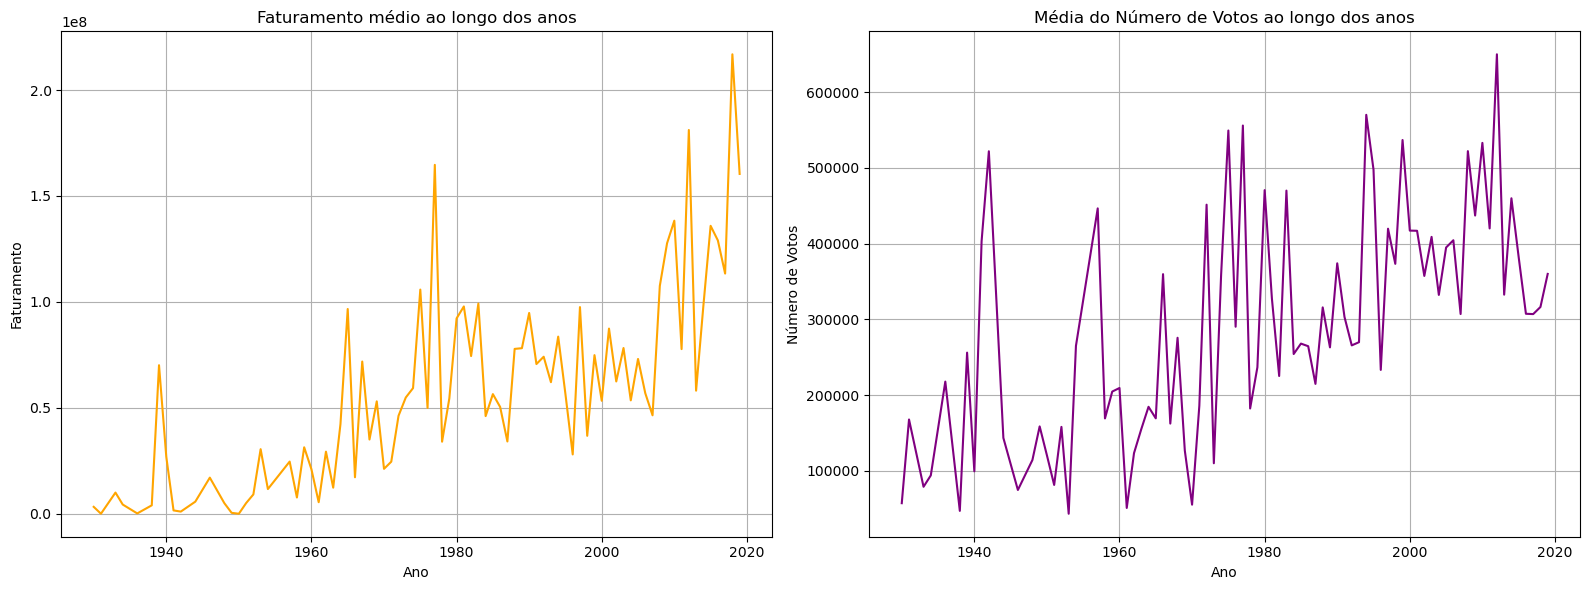

In [54]:
# 'Gross' e 'No_of_Votes' ao longo dos anos
df_fat_anual = df_clean.groupby('Released_Year')['Gross'].mean().reset_index()
df_votos_anual = df_clean.groupby('Released_Year')['No_of_Votes'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(df_fat_anual['Released_Year'], df_fat_anual['Gross'], color='orange')
ax[0].set_title('Faturamento médio ao longo dos anos')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Faturamento')
ax[0].grid()

ax[1].plot(df_votos_anual['Released_Year'], df_votos_anual['No_of_Votes'], color='purple')
ax[1].set_title('Média do Número de Votos ao longo dos anos')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Número de Votos')
ax[1].grid()

plt.tight_layout()
plt.show()

## 3. Série temporal de `IMDB_Rating` e `Meta_score`
- A pouca presença de filmes mais antigos na base cria anos iniciais com maiores spikes de média de cada uma dessas variáveis. mas conseguimos ver com clareza uma tendência de melhores notas para filmes mais antigos, tornando interessante avaliar a correlação entre o ano de lançamento e as notas no IMDB, uma tendência também observada no Meta Score, tornando-se possível avaliar se a crítica de fato prefere os "filmes mais antigos".


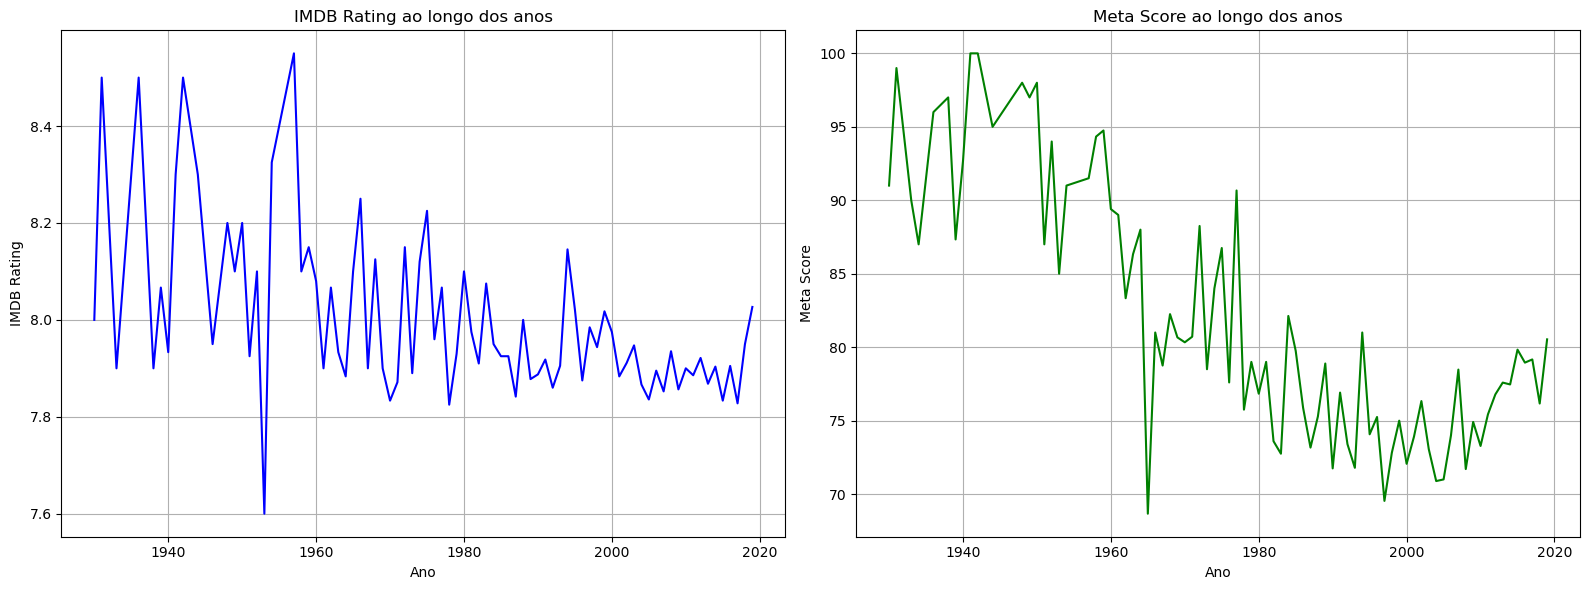

In [22]:
# 'IMDB_Rating' e 'Meta_score' ao longo dos anos
df_nota_anual = df_clean.groupby('Released_Year')[['IMDB_Rating', 'Meta_score']].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(df_nota_anual['Released_Year'], df_nota_anual['IMDB_Rating'], color='blue')
ax[0].set_title('IMDB Rating ao longo dos anos')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('IMDB Rating')
ax[0].grid()

ax[1].plot(df_nota_anual['Released_Year'], df_nota_anual['Meta_score'], color='green')
ax[1].set_title('Meta Score ao longo dos anos')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Meta Score')
ax[1].grid()

plt.tight_layout()
plt.show()

## 4. Histogramas das variáveis numéricas
- O objetivo é compreender e analisar a distribuição de cada uma das variáveis numéricas do conjunto de dados.

- Esse passo é fundamental, pois o padrão de distribuição influencia diretamente a escolha e o desempenho de diferentes tipos de modelos de aprendizado de máquina.

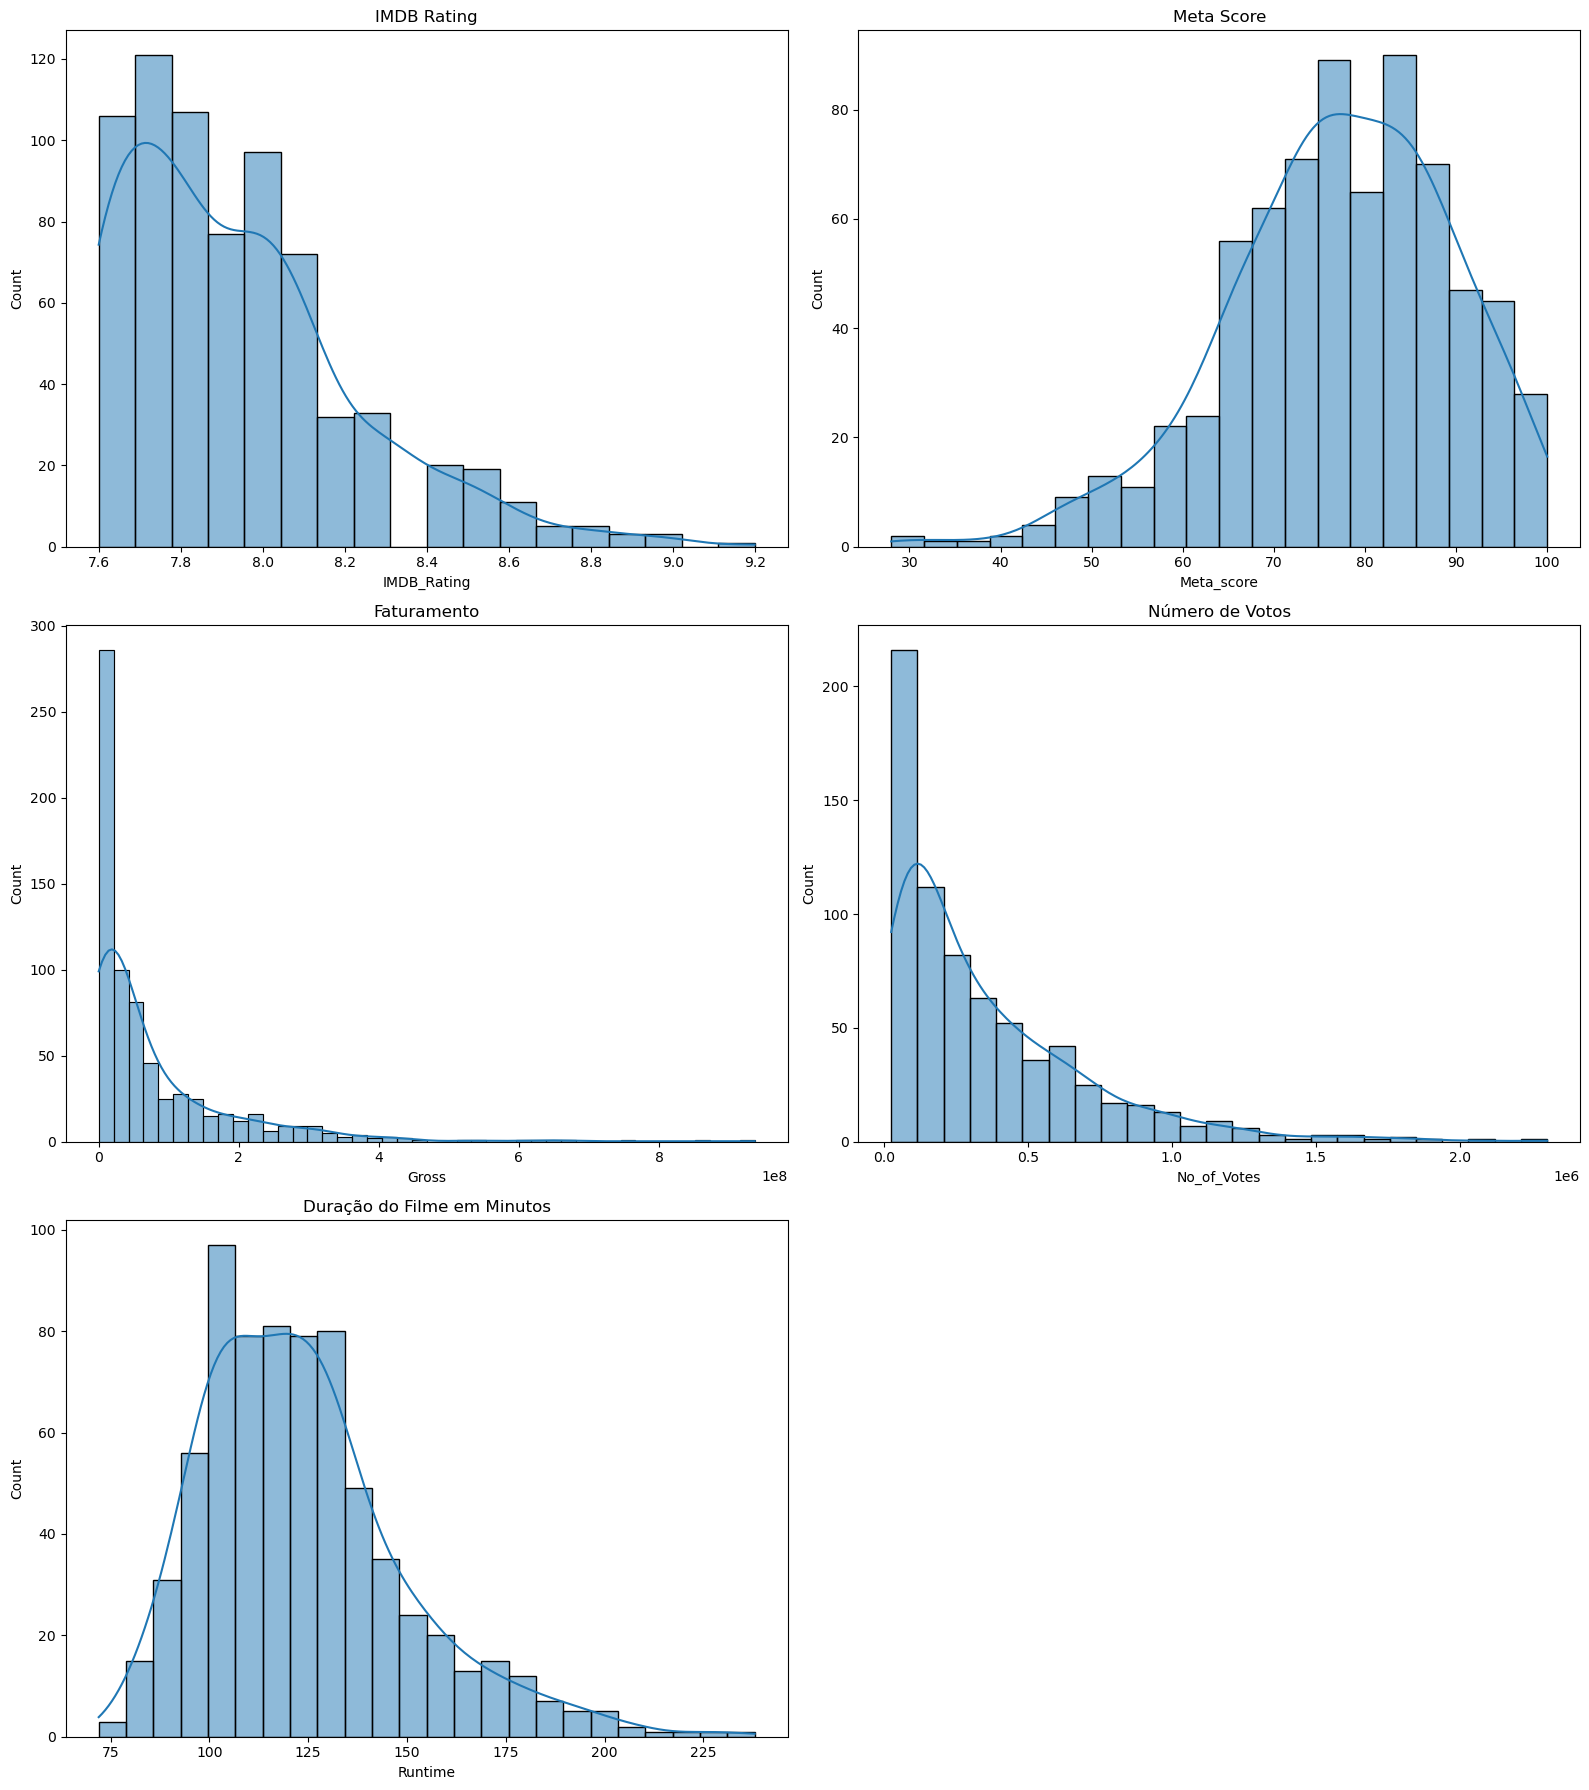

In [23]:
# Histogramas de 'IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes' e 'Runtime'

fig, ax = plt.subplots(3, 2, figsize=(16, 18))

sns.histplot(x='IMDB_Rating', kde=True, data=df_clean, ax=ax[0, 0])
ax[0, 0].set_title('IMDB Rating')

sns.histplot(x='Meta_score', kde=True, data=df_clean, ax=ax[0, 1])
ax[0, 1].set_title('Meta Score')

sns.histplot(x='Gross', kde=True, data=df_clean, ax=ax[1, 0])
ax[1, 0].set_title('Faturamento')

sns.histplot(x='No_of_Votes', kde=True, data=df_clean, ax=ax[1, 1])
ax[1, 1].set_title('Número de Votos')

sns.histplot(x='Runtime', kde=True, data=df_clean, ax=ax[2, 0])
ax[2, 0].set_title('Duração do Filme em Minutos')

ax[2, 1].axis('off')  # Desativar o eixo vazio

plt.tight_layout()
plt.show()


## 5. Boxplots das variáveis numéricas
- Fornece uma visualização complementar aos histogramas, permitindo analisar com mais detalhes os quartis, a mediana e a presença de possíveis outliers em cada variável.
    - Percebe-se a forte presença de outliers em faturamento e número de votos, casando com o histograma de cada uma dessas variáveis, onde apresenta uma distribuições assimétricas fortes.


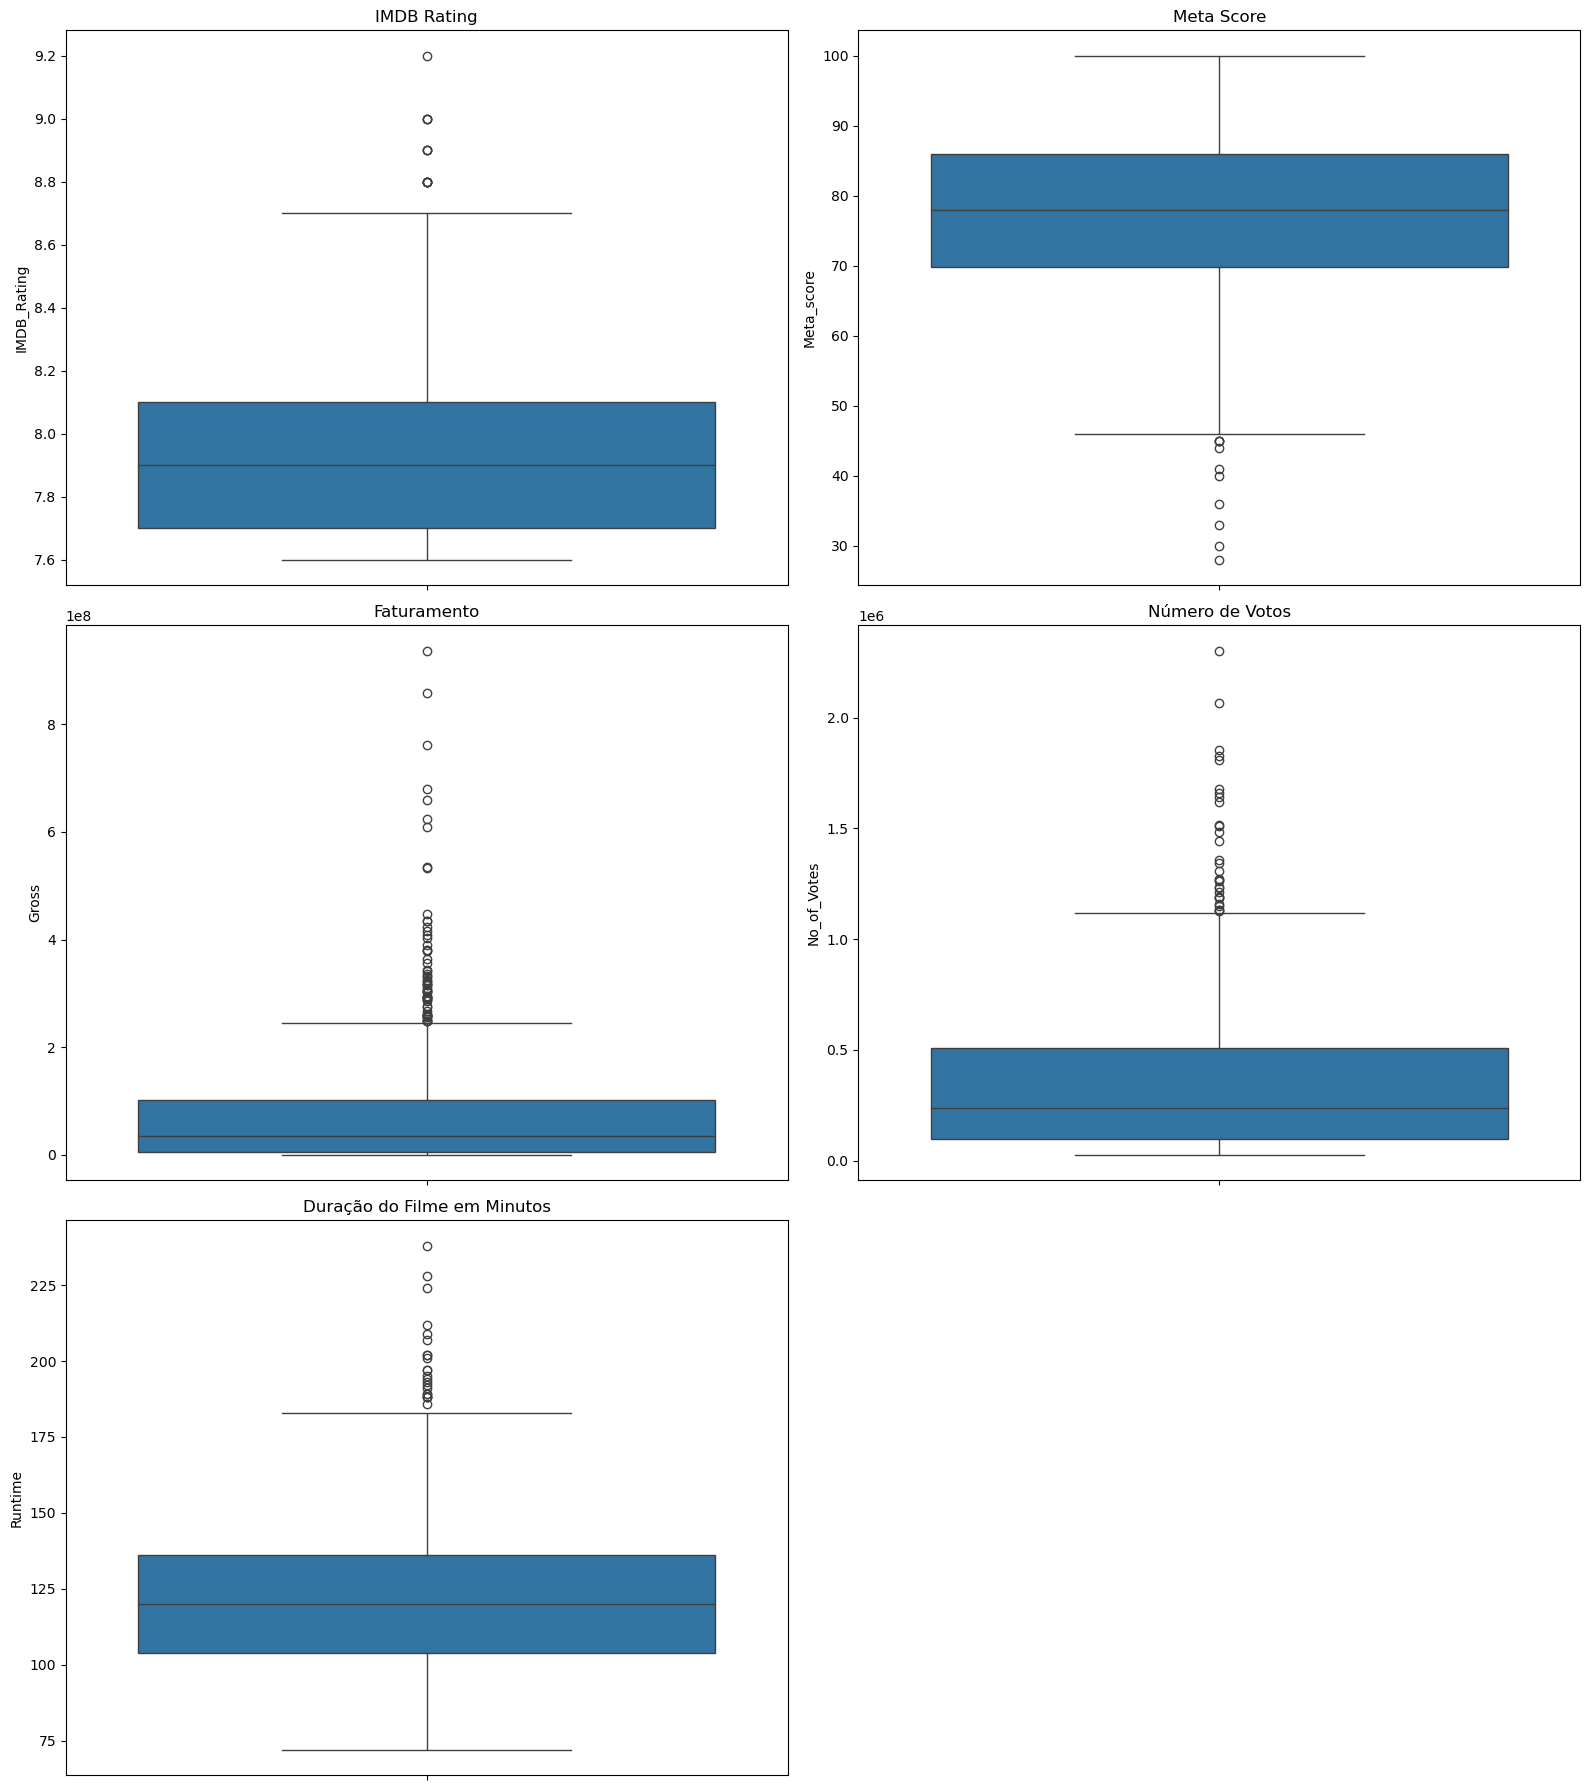

In [24]:
# Boxplots 'IMDB_Rating', 'Meta_score', 'Gross', 'No_of_Votes' e 'Runtime'
fig, ax = plt.subplots(3, 2, figsize=(16, 18))

sns.boxplot(y='IMDB_Rating', data=df_clean, ax=ax[0, 0])
ax[0, 0].set_title('IMDB Rating')

sns.boxplot(y='Meta_score', data=df_clean, ax=ax[0, 1])
ax[0, 1].set_title('Meta Score')

sns.boxplot(y='Gross', data=df_clean, ax=ax[1, 0])
ax[1, 0].set_title('Faturamento')

sns.boxplot(y='No_of_Votes', data=df_clean, ax=ax[1, 1])
ax[1, 1].set_title('Número de Votos')

sns.boxplot(y='Runtime', data=df_clean, ax=ax[2, 0])
ax[2, 0].set_title('Duração do Filme em Minutos')

ax[2, 1].axis('off')  # Desativar o eixo vazio

plt.tight_layout()
plt.show()

## 6. Gráficos de dispersão das variáveis numéricas com `IMDB_Rating`
- Esses gráficos permitem analisar visualmente a relação entre cada variável numérica e a nota do IMDB.

- São importantes para identificar padrões, tendências e possíveis correlações lineares ou não lineares.

- Também ajudam a detectar outliers ou comportamentos atípicos que podem impactar a modelagem e a interpretação dos dados.

- Nele conseguimos inferir algumas observações:
    - Baixa correlação do faturamento com notas do IMDB
    - Correlação linear média-forte de número de votos com nota do IMDB, vemos que o crescimento do número de votos "anda" junto com o crescimento de notas do IMDB
    - Fraca correlação entre tempo de duração e notas do IMDB, mas conseguimos visualizar um certo limiar de duração de filmes para altas notas, indicando que ainda existe algum tipo de correlação a ser extraída desse dado
    - Meta score apresenta uma visualização interessante, visto que, baixas notas no meta score também apresentam baixas notas no IMDB, entretanto, altas notas não aparentam influenciar muito no `IMDB_Rating`

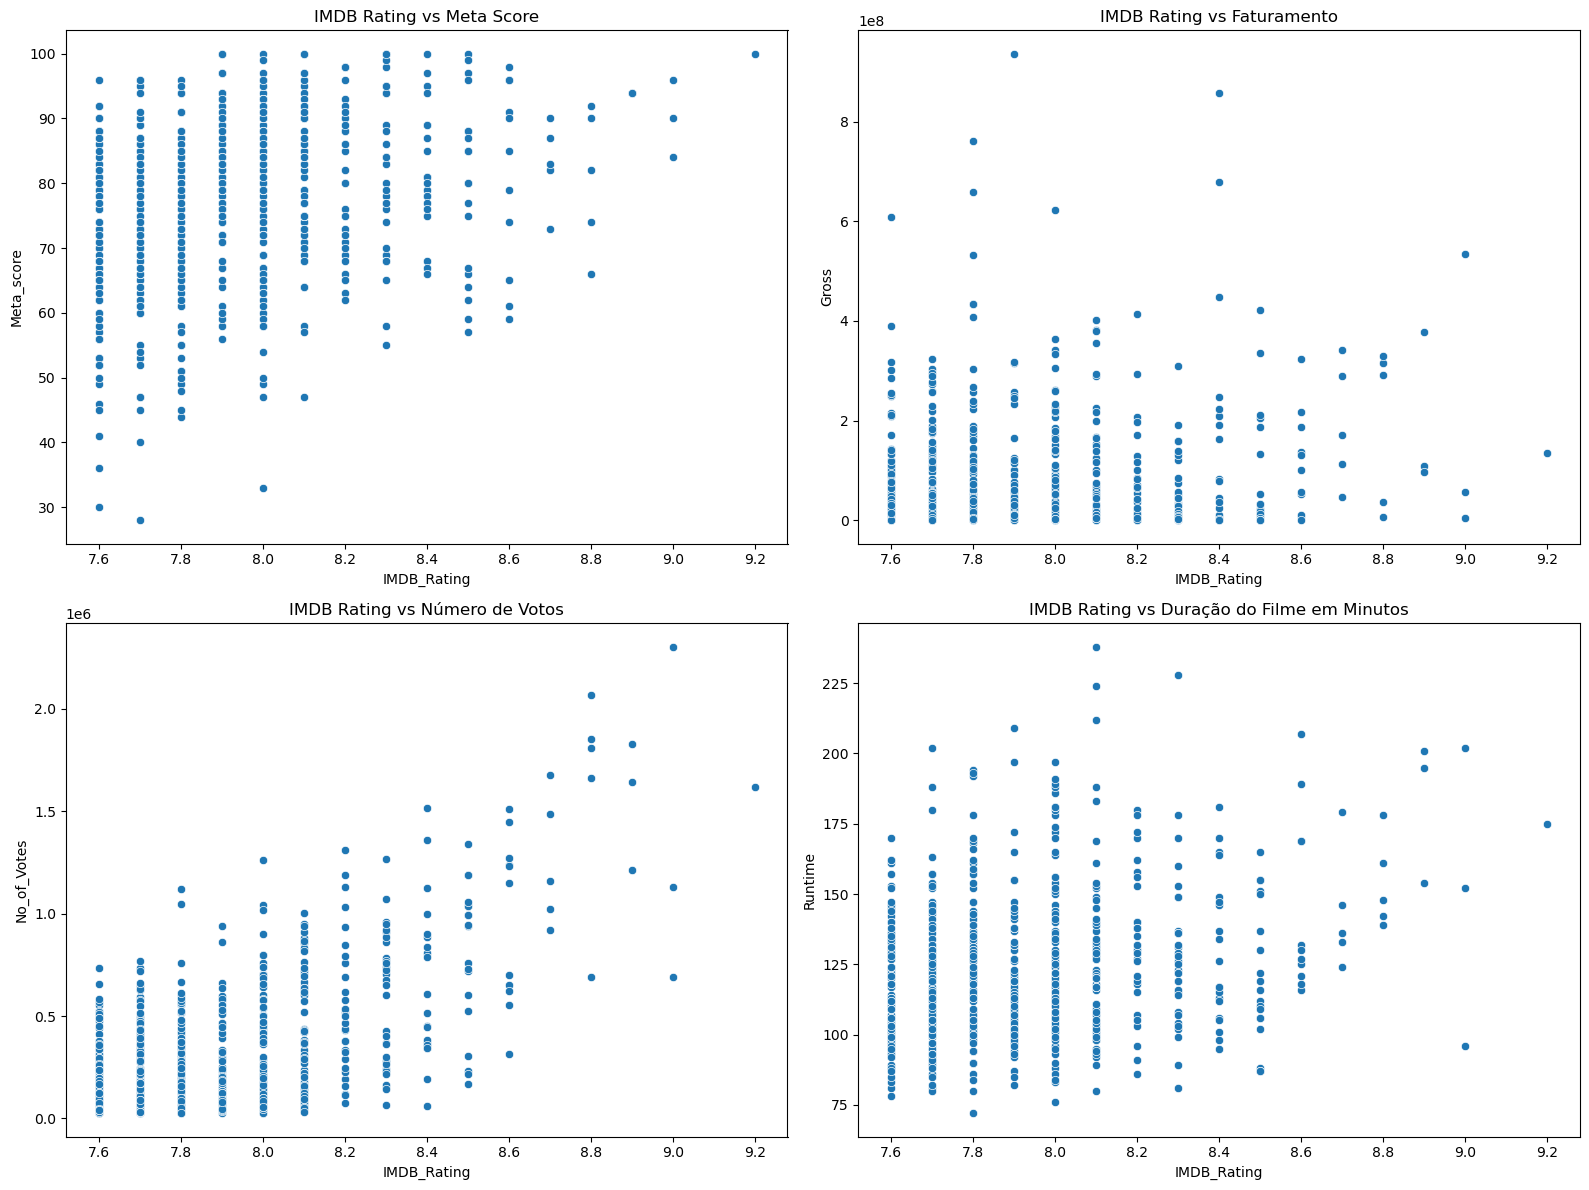

In [25]:
# Scatterplots 'IMDB_rating' e variáveis numéricas
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=df_clean, ax=ax[0, 0])
ax[0, 0].set_title('IMDB Rating vs Meta Score')

sns.scatterplot(x='IMDB_Rating', y='Gross', data=df_clean, ax=ax[0, 1])
ax[0, 1].set_title('IMDB Rating vs Faturamento')

sns.scatterplot(x='IMDB_Rating', y='No_of_Votes', data=df_clean, ax=ax[1, 0])
ax[1, 0].set_title('IMDB Rating vs Número de Votos')

sns.scatterplot(x='IMDB_Rating', y='Runtime', data=df_clean, ax=ax[1, 1])
ax[1, 1].set_title('IMDB Rating vs Duração do Filme em Minutos')

plt.tight_layout()
plt.show()

## 7. Boxplots para cada classificação indicativa ou _Rated_ dos filmes
- A baixa amostra em alguns tipos de classificação afetam nao real entendimento do comportamento de algumas classificações
- Entretanto, podemos observar que alguns tipos de classificações apresentam medianas maiores, indicando uma certa preferência da crítica por um certo teor de `Certificate`, como:
    - G - General Audience
    - Passed - Sem classificação
- E algumas classificações com forte presença de outlier:
    - A - Adulto
    - UA - Acima de 12 anos
    - U - Universal

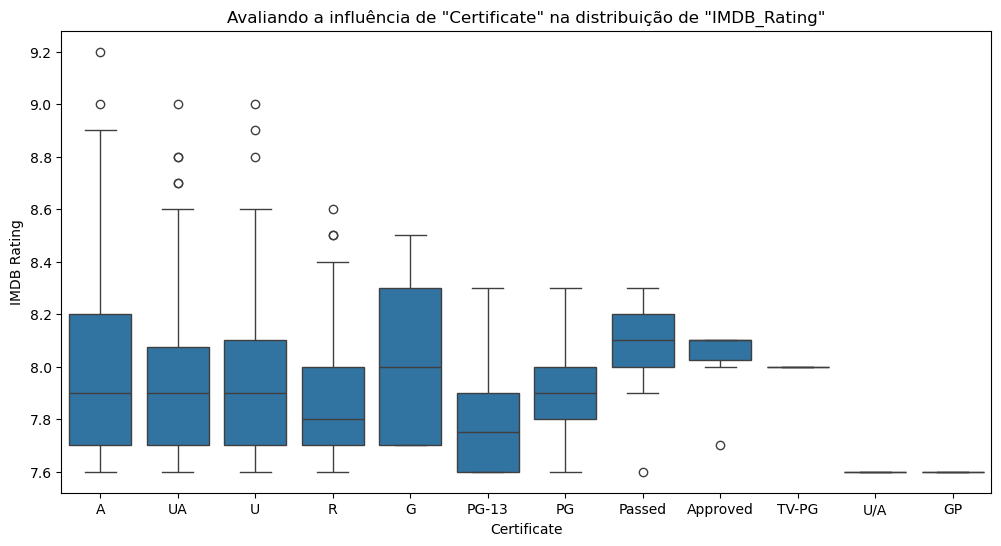

In [27]:
# Avaliando a influência de 'Certificate' na distribuição de notas em 'IMDB_Rating'

plt.figure(figsize=(12, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df_clean)
plt.title('Avaliando a influência de "Certificate" na distribuição de "IMDB_Rating"')
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.show()


## 8. Expandindo a coluna `Genre` em três colunas diferentes e avaliando a influência de cada gênero na nota IMDB através de boxplots
- Com foco em entender a real influência de cada gênero na nota do IMDB foi-se expandida a coluna em outras 3, constando cada um dos gêneros, importante notar que nem todo filme apresenta 3 diferentes gêneros e para a 3ª coluna ele ficara com o valor `None`
- A partir disso foi-se criado 3 boxplots para cada coluna que chamamos de `Gênero 1`,`Gênero 2` e`Gênero 3` 
    - Conseguimos enxergar que filmes que tem o gênero **Western** como o primeiro gênero, apresentam notas maiores no IMDB, indicando uma certa preferência da crítica a esse gênero de filme
    - **Drama** é um gênero que permeia todas as 3 colunas e constantemente apresenta boas notas e presenças de outliers, sendo um indicador interessante e com alguma correlação com notas em filmes no IMDB
    - **Mistery** é outro gênero que apresenta uma boa mediana e constância em notas no IMDB, também aparecendo em mais de uma coluna, indicando forte presença em grande parte dos filmes

Quantidade de gêneros diferentes: 172




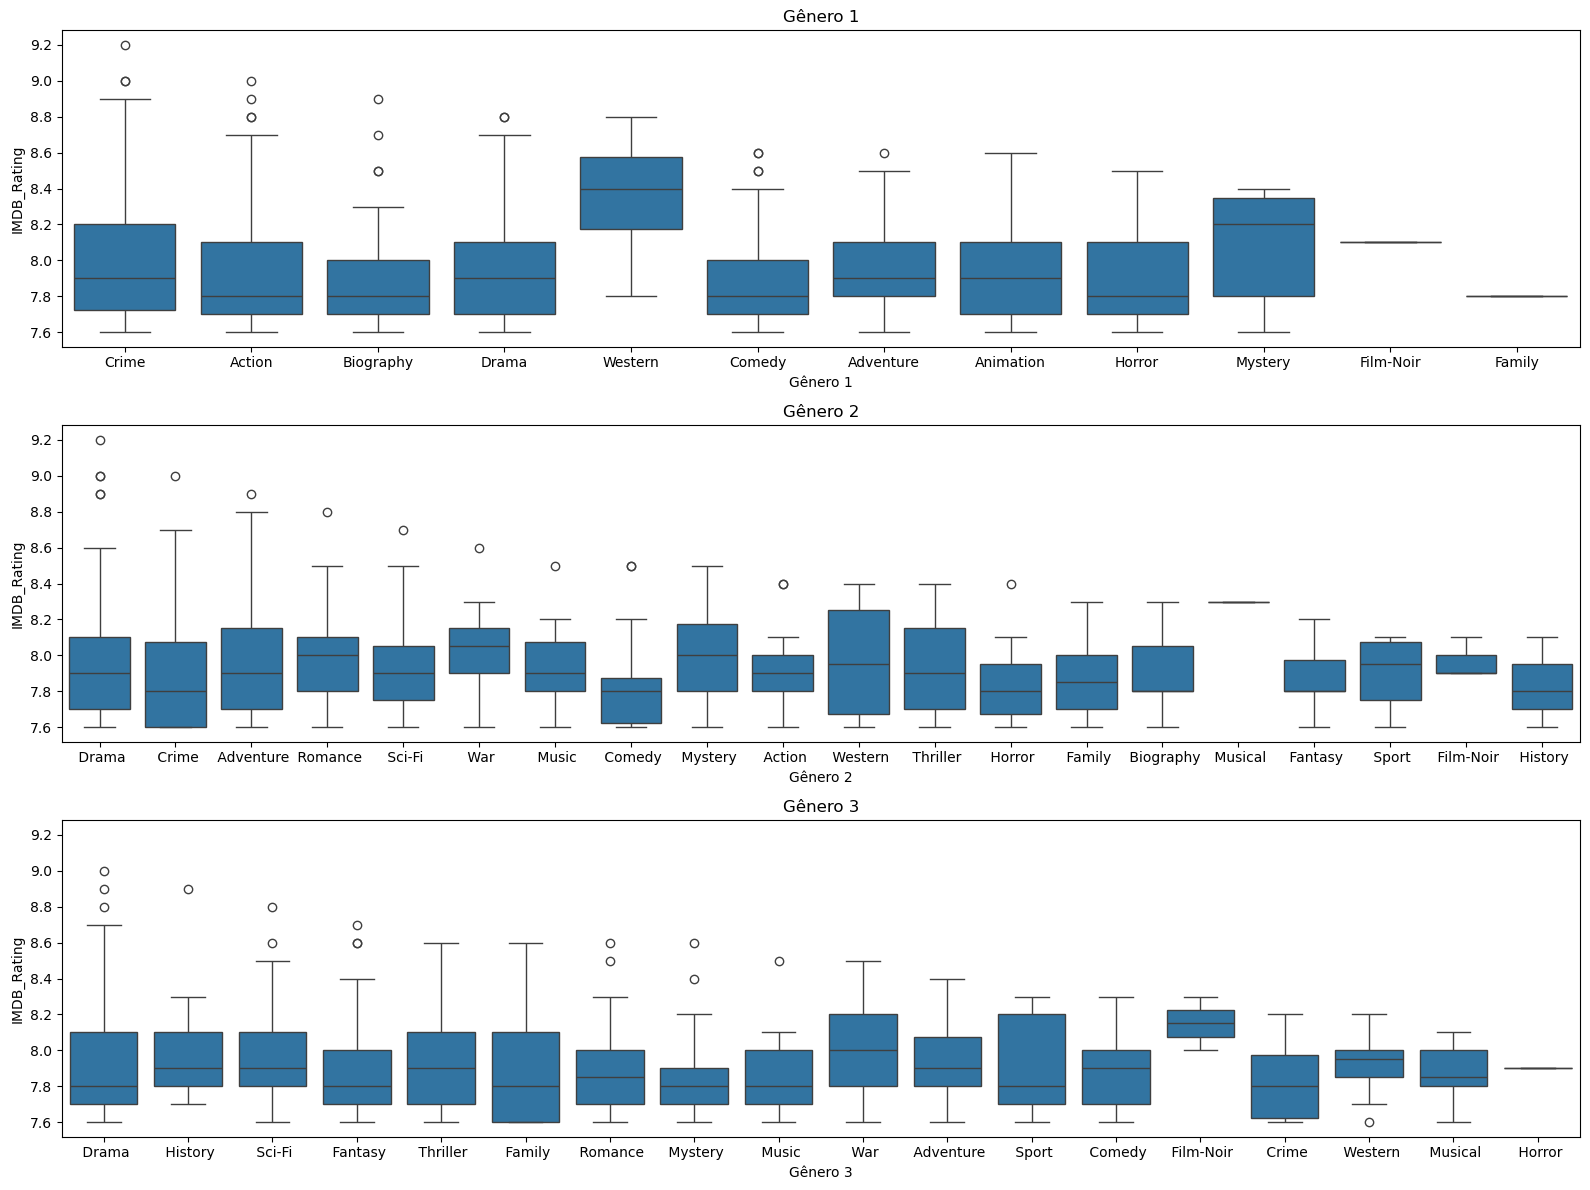

In [ ]:
# Quantidade de 'Genres' diferentes
print(f"Quantidade de gêneros diferentes: {df_clean['Genre'].nunique()}\n\n")


# Avaliando a influência de 'Genre' na distribuição de notas em 'IMDB_Rating'
genres = df_clean['Genre'].str.split(',', expand=True)
genres = genres.rename(columns = {0: 'Gênero 1',
                                  1: 'Gênero 2',
                                  2: 'Gênero 3',}) #Expandindo os gêneros, visto que, um mesmo filme apresenta pelo menos 2 gêneros diferentes

df_genres = df_clean[['IMDB_Rating']].join(genres)

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharey=True)

sns.boxplot(x='Gênero 1', y='IMDB_Rating', data=df_genres, ax=axes[0])
axes[0].set_title('Gênero 1')

sns.boxplot(x='Gênero 2', y='IMDB_Rating', data=df_genres, ax=axes[1])
axes[1].set_title('Gênero 2')

sns.boxplot(x='Gênero 3', y='IMDB_Rating', data=df_genres, ax=axes[2])
axes[2].set_title('Gênero 3')

plt.tight_layout()
plt.show()


## 9. Generalizando os gêneros de filmes e verificando a correlação de cada um no faturamento dos filmes
- Como os gêneros estão presente em mais de uma coluna, torna-se interessante buscar generalizar essa coluna com foco em extrair métricas mais precisas de faturamento para cada tipo gênero
- Com isso, foi-se criada uma concatenação dessas 3 colunas juntamente com a variável faturamento e foi feito um `.groupby().agg(['mean','sum','median','std'])` com foco em somar os valores de faturamento de todos os gêneros e extrair dados de média, mediana, soma e desvio padrão desses valores
- Em seguida, foi-se plotado gráficos de barra dessas métrica com foco em entender quais gêneros mais influenciam no valor do faturamento, sendo o top5:

    - Adventure → Aventura

    - Sci-Fi → Ficção Científica

    - Action → Ação

    - Animation → Animação

    - Fantasy → Fantasia

Quantidade de gêneros diferentes: 172




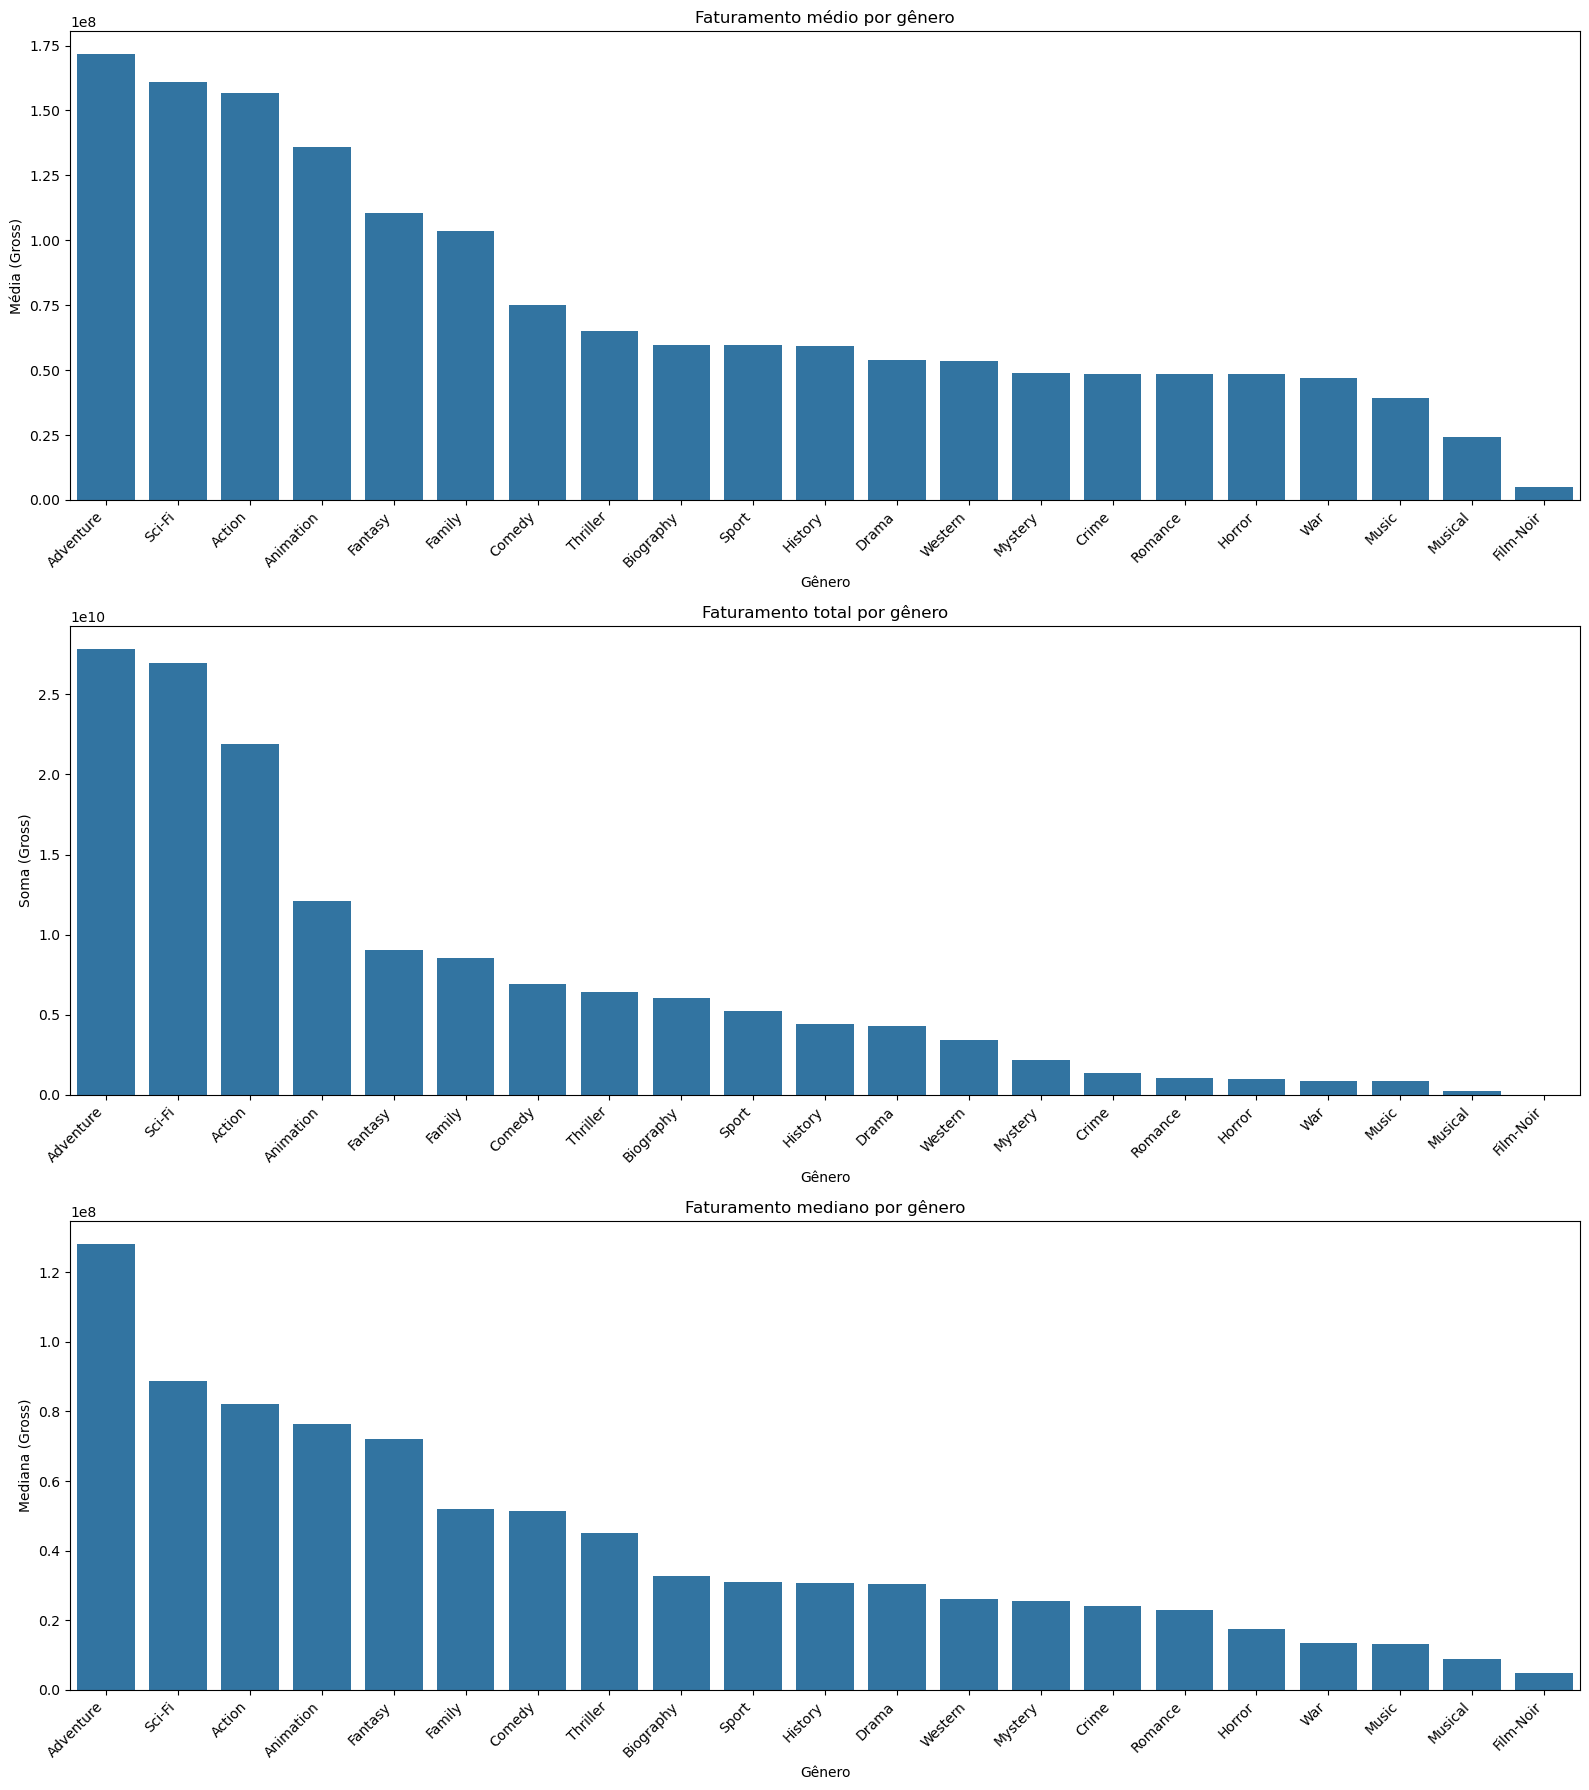

Top 5 gêneros com maior faturamento


,Gênero,mean,sum,median,std
1,Adventure,1.718806e+08,2.784466e+10,128170298.0,1.743606e+08
16,Sci-Fi,1.611225e+08,9.022858e+09,82036605.5,1.905785e+08
0,Action,1.566213e+08,2.192699e+10,88607203.5,1.780834e+08
2,Animation,1.359713e+08,8.566191e+09,76408097.0,1.448799e+08
8,Fantasy,1.105749e+08,6.081620e+09,52037603.0,1.465399e+08


In [50]:
# Quantidade de 'Genres' diferentes
print(f"Quantidade de gêneros diferentes: {df_clean['Genre'].nunique()}\n\n")

# Avaliando a influência de 'Genre' na distribuição de notas em 'IMDB_Rating'
genres = df_clean['Genre'].str.split(',', expand=True)
genres = genres.rename(columns = {0: 'Gênero 1',
                                  1: 'Gênero 2',
                                  2: 'Gênero 3',}) #Expandindo os gêneros, visto que, um mesmo filme apresenta pelo menos 2 gêneros diferentes

df_genres = df_clean[['Gross']].join(genres)

# Concatenar todas as colunas de gênero em uma coluna só
all_genres = pd.concat([
    df_genres[['Gênero 1', 'Gross']].rename(columns={'Gênero 1': 'Gênero'}),
    df_genres[['Gênero 2', 'Gross']].rename(columns={'Gênero 2': 'Gênero'}),
    df_genres[['Gênero 3', 'Gross']].rename(columns={'Gênero 3': 'Gênero'})
])

# Remover nulos
all_genres = all_genres.dropna(subset=['Gênero'])

# Normalizar: remover espaços extras e transformar em maiúscula/minúscula consistente
all_genres['Gênero'] = all_genres['Gênero'].str.strip()  # remove espaços
all_genres['Gênero'] = all_genres['Gênero'].str.title()  # padroniza capitalização

# Agrupar pelo gênero e calcular métricas
fat_genres = all_genres.groupby('Gênero')['Gross'].agg(['mean','sum','median','std']).reset_index()

# Ordenar, se desejar
fat_genres = fat_genres.sort_values('mean', ascending=False)

fig, axes = plt.subplots(3, 1, figsize=(16, 18))

sns.barplot(x='Gênero', y='mean', data=fat_genres.sort_values('mean', ascending=False), ax=axes[0])
axes[0].set_title('Faturamento médio por gênero')
axes[0].set_ylabel('Média (Gross)')
axes[0].set_xticklabels(fat_genres['Gênero'], rotation=45, ha='right')

sns.barplot(x='Gênero', y='sum', data=fat_genres.sort_values('sum', ascending=False), ax=axes[1])
axes[1].set_title('Faturamento total por gênero')
axes[1].set_ylabel('Soma (Gross)')
axes[1].set_xticklabels(fat_genres['Gênero'], rotation=45, ha='right')

sns.barplot(x='Gênero', y='median', data=fat_genres.sort_values('median', ascending=False), ax=axes[2])
axes[2].set_title('Faturamento mediano por gênero')
axes[2].set_ylabel('Mediana (Gross)')
axes[2].set_xticklabels(fat_genres['Gênero'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

print('Top 5 gêneros com maior faturamento')
fat_genres.head()


## 10. Investigando diretores e atores com melhores e piores notas no IMDB
- Seguindo uma lógica de tentar entender a influência de variáveis na nota do IMDB, foi-se investigado os top 5 melhores e piores diretores e atores em relação a nota e filme, todavia verificou-se também a quantidade de aparições de cada um destes e por mais que a base contenha 712 filmes, ela também apresenta 402 diretores e mais de 1912 atores diferentes, tornando uma métrica um pouco enviesada pela baixa quantidade de amostra de cada ator e diretor. Entretanto, é interessante entender alguns padrões e analisar com certa profundidade essas questões
- Um Feature Engineering focado nesse trecho de ator e diretor será efetuado no **Notebook** de modelagem, com foco em tentar generalizar esses dados e trazer variáveis que agreguem informação acerca do peso do diretor e do elenco que compõe o filme, buscando não apontar qual diretor e atores compõe o filme, mas sim se os atores e diretores deste filme "costumam realizar bons filmes".

In [29]:
# Quantidade de 'Directors' diferentes
print(f"Quantidade de diretores diferentes: {df_clean['Director'].nunique()}\n")
diretores = df_clean['Director'].unique()
print(f"Diretores presentes na base:{diretores[:10]}...\n")

# Top 5 diretores com maior média de 'IMDB_Rating'
top5_diretores = df_clean.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)
print(f"\nTop 5 diretores com maior média de 'IMDB_Rating':\n{top5_diretores}")

# Top 5 diretores com menor média de 'IMDB_Rating'
top5_diretores_inferiores = df_clean.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=True).head(5)
print(f"\nTop 5 diretores com menor média de 'IMDB_Rating':\n{top5_diretores_inferiores}")

# Top 5 diretores com mais filmes na base 
# Obs: O top5 com menos filmes se resume a diretores com somente 1 aparição na base
top5_diretores_mais_filmes = df_clean['Director'].value_counts().head(5)
print(f"\nTop 5 diretores com mais filmes:\n{top5_diretores_mais_filmes}")



Quantidade de diretores diferentes: 402

Diretores presentes na base:['Francis Ford Coppola' 'Christopher Nolan' 'Sidney Lumet' 'Peter Jackson'
 'Quentin Tarantino' 'Steven Spielberg' 'David Fincher' 'Robert Zemeckis'
 'Sergio Leone' 'Lana Wachowski']...


Top 5 diretores com maior média de 'IMDB_Rating':
Director
Lana Wachowski        8.7
Irvin Kershner        8.7
George Lucas          8.6
Roberto Benigni       8.6
Fernando Meirelles    8.6
Name: IMDB_Rating, dtype: float64

Top 5 diretores com menor média de 'IMDB_Rating':
Director
Hiromasa Yonebayashi    7.6
Gregg Araki             7.6
Stephen Frears          7.6
Ted Demme               7.6
Eric Bress              7.6
Name: IMDB_Rating, dtype: float64

Top 5 diretores com mais filmes:
Director
Steven Spielberg    13
Martin Scorsese     10
Alfred Hitchcock     9
David Fincher        8
Clint Eastwood       8
Name: count, dtype: int64


In [30]:
# Quantidade de 'Stars' diferentes
todas_estrelas = pd.concat([
    df_clean['Star1'],
    df_clean['Star2'],
    df_clean['Star3'],
    df_clean['Star4']
])

# Total de atores na base
total_estrelas_unicas = todas_estrelas.nunique()
print(f"Total de estrelas únicas na base: {total_estrelas_unicas}\n")

# Verificando a influência das estrelas de cinema na avaliação dos seus filmes conforme 'IMDB_Rating'
print(f"Top 5 'Star1' com maior 'IMDB_Rating':\n{df_clean.groupby('Star1')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)}\n")
print(f"Top 5 'Star2' com maior 'IMDB_Rating':\n{df_clean.groupby('Star2')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)}\n")
print(f"Top 5 'Star3' com maior 'IMDB_Rating':\n{df_clean.groupby('Star3')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)}\n")
print(f"Top 5 'Star4' com maior 'IMDB_Rating':\n{df_clean.groupby('Star4')['IMDB_Rating'].mean().sort_values(ascending=False).head(5)}\n")

# Top 5 estrelas com mais filmes na base
# Obs: O top5 com menos filmes se resume a atores com somente 1 aparição na base
print(f"\nTop 5 'Star1' com mais filmes na base:\n{df_clean['Star1'].value_counts().head(5)}")
print(f"\nTop 5 'Star2' com mais filmes na base:\n{df_clean['Star2'].value_counts().head(5)}")
print(f"\nTop 5 'Star3' com mais filmes na base:\n{df_clean['Star3'].value_counts().head(5)}")
print(f"\nTop 5 'Star4' com mais filmes na base:\n{df_clean['Star4'].value_counts().head(5)}")


Total de estrelas únicas na base: 1912

Top 5 'Star1' com maior 'IMDB_Rating':
Star1
John Travolta      8.90
Elijah Wood        8.80
Lilly Wachowski    8.70
Marlon Brando      8.65
Toshirô Mifune     8.60
Name: IMDB_Rating, dtype: float64

Top 5 'Star2' com maior 'IMDB_Rating':
Star2
Lee J. Cobb      9.0
Ralph Fiennes    8.9
Edward Norton    8.8
Eli Wallach      8.8
Ray Liotta       8.7
Name: IMDB_Rating, dtype: float64

Top 5 'Star3' com maior 'IMDB_Rating':
Star3
James Caan       9.2
Aaron Eckhart    9.0
Martin Balsam    9.0
Ian McKellen     8.9
Ben Kingsley     8.9
Name: IMDB_Rating, dtype: float64

Top 5 'Star4' com maior 'IMDB_Rating':
Star4
Diane Keaton        9.1
John Fiedler        9.0
Bruce Willis        8.9
Caroline Goodall    8.9
Ken Watanabe        8.8
Name: IMDB_Rating, dtype: float64


Top 5 'Star1' com mais filmes na base:
Star1
Tom Hanks            11
Clint Eastwood       10
Al Pacino            10
Robert De Niro       10
Leonardo DiCaprio     9
Name: count, dtype: int6

## 11. Nuvem de palavras da coluna `Overview`

- A coluna `Overview` trata-se de uma sinopse do filme e um desafio abordado seria de tentar abordar insights a partir dela, com isso foi-se realizado a implementação de uma _wordcloud_ dessa coluna com foco em elaborar uma abordagem para extrair informações da mesma

- Para a elaboração de um _wordcloud_ é necessário primeiro tratar e unificar os dados, ou seja, extrair caracteres especiais, números, padrozinar as palavras e juntar tudo num só texto, para que o modelo de geração de nuvem de palavras realize a contagem e plotagem da imagem

- Interessante também verificar a frequência em que cada uma dessas principais palavras aparecem e para isso foi-se criado um barplot que aborda a frequência de aparecimento de cada palavra no texto completo das sinopses

> Uma análise mais profunda acerca dos insights extraídos foi abordada na parte inicial do notebook relacionada à pergunta .c

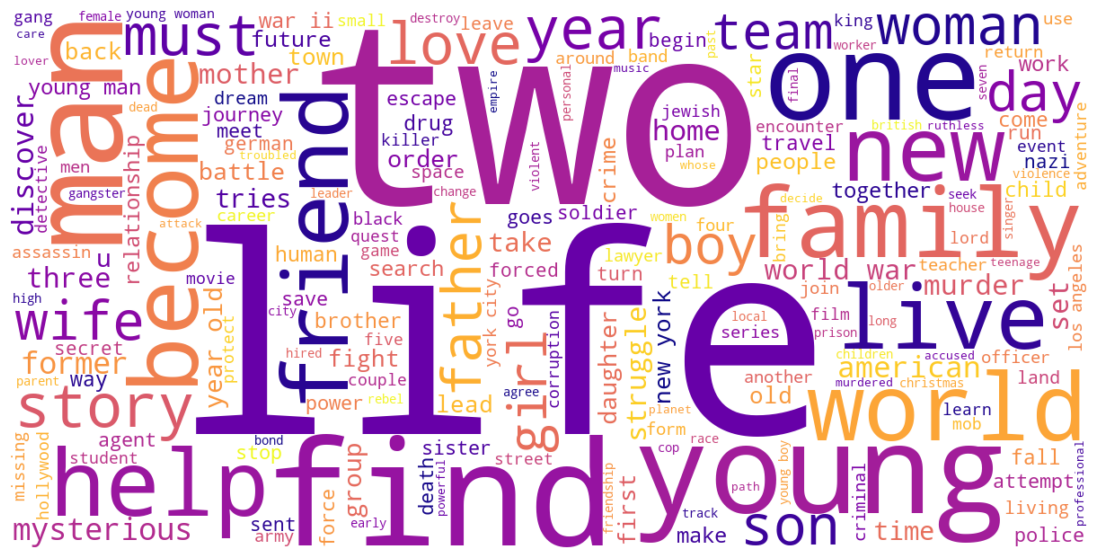

In [ ]:
# Juntando as stopwords do nltk com as do wordcloud
# Obs: importante notar que somente as stopwords do wordcloud não seriam suficientes para a elaboração de um nuvem 'limpa'
stopwords_en = set(stopwords.words("english")) | set(STOPWORDS)

# Juntar todas as sinopses/overviews
texto = " ".join(str(overview) for overview in df_clean['Overview'].dropna())

# Padronizando os caracteres usando regex - remoção de caracteres especiais, números e transformar em lowercase
texto = re.sub(r"[^a-zA-Z\s]", " ", texto).lower()

# Gerar wordcloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    stopwords=stopwords_en,
    colormap="plasma"
).generate(texto)

# Plotar
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

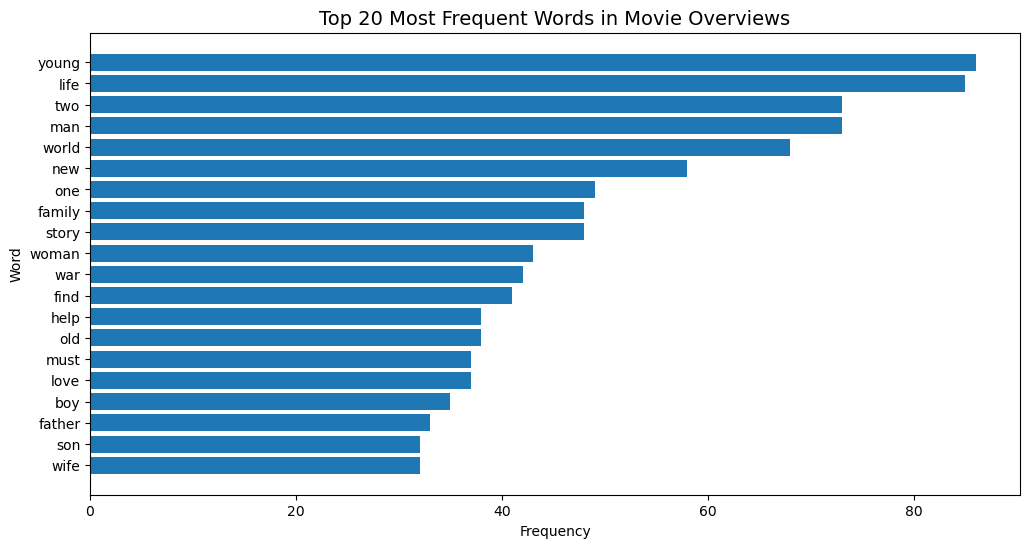

In [ ]:
# Lista de palavras
palavras = texto.split()

# Remover stopwords e palavras curtas - palavras com mais de 2 caracteres
palavras_filtradas = [p for p in palavras if p not in stopwords_en and len(p) > 2]

# Contar frequência
contagem = Counter(palavras_filtradas)

# Pegar top 20
top_20 = contagem.most_common(20)

# Converter para DataFrame
df_freq = pd.DataFrame(top_20, columns=["Word", "Frequency"])

# Gráfico
plt.figure(figsize=(12,6))
plt.barh(df_freq["Word"], df_freq["Frequency"])
plt.gca().invert_yaxis()
plt.title("Top 20 palavras mais frequentes na coluna 'Overview'", fontsize=14)
plt.xlabel("Frequencia")
plt.ylabel("Palavra")
plt.show()

## 12. Algoritmo de recomendação de filme
- O algoritmo abaixo utiliza-se de métricas voltadas para seleciona os melhores filmes com base em notas da crítica Meta score e IMDB e popularidade, através do número de votos
- Ele seleciona somente os top 25% filmes das 3 métricas e seleciona 5 filmes aleatórios dentro desses escopo de filmes para recomendação

In [31]:
def recomendacao_de_filme(df):
    # Filtrar filmes top 25% ou dentro do 3º quartil
    criterios = {
        'imdb': df['IMDB_Rating'].quantile(0.75),
        'votos': df['No_of_Votes'].quantile(0.75),
        'meta': df['Meta_score'].quantile(0.75)
    }
    
    candidatos = df[
        (df['IMDB_Rating'] >= criterios['imdb']) & 
        (df['No_of_Votes'] >= criterios['votos']) & 
        (df['Meta_score'] >= criterios['meta'])
    ]
    
    # 5 filmes aleatórios
    filmes_escolhidos = candidatos.sample(5)
    
    print("RESPOSTA: Qual filme recomendaria para uma pessoa desconhecida?")
    print("=" * 70)
    print(f"CRITÉRIOS:")
    print(f"• Qualidade (IMDB ≥ {criterios['imdb']:.1f})")
    print(f"• Popularidade (Votos ≥ {criterios['votos']:,.0f})")  
    print(f"• Crítica especializada (Meta Score ≥ {criterios['meta']:.0f})")
    print(f"\nDos {len(candidatos)} filmes elegíveis, recomendo qualquer um destes 5:")
    print()
    
    for i in range(len(filmes_escolhidos)):
        filme = filmes_escolhidos.iloc[i]
        print(f"{i+1}. {filme['Series_Title']} ({filme['Released_Year']})")
        print(f"   IMDB: {filme['IMDB_Rating']} | Meta: {filme['Meta_score']} | Gênero: {filme['Genre']}")
    
    print(f"\nJUSTIFICATIVA:")
    print("Estes filmes combinam alta qualidade técnica, aprovação massiva do público")
    print("e reconhecimento da crítica especializada - garantindo satisfação independente")
    print("do gosto pessoal da pessoa.")
    
    return filmes_escolhidos

recomendacao_filme = recomendacao_de_filme(df_clean)

RESPOSTA: Qual filme recomendaria para uma pessoa desconhecida?
CRITÉRIOS:
• Qualidade (IMDB ≥ 8.1)
• Popularidade (Votos ≥ 506,543)
• Crítica especializada (Meta Score ≥ 86)

Dos 38 filmes elegíveis, recomendo qualquer um destes 5:

1. Whiplash (2014)
   IMDB: 8.5 | Meta: 88.0 | Gênero: Drama, Music
2. Pan's Labyrinth (2006)
   IMDB: 8.2 | Meta: 98.0 | Gênero: Drama, Fantasy, War
3. Gisaengchung (2019)
   IMDB: 8.6 | Meta: 96.0 | Gênero: Comedy, Drama, Thriller
4. Star Wars (1977)
   IMDB: 8.6 | Meta: 90.0 | Gênero: Action, Adventure, Fantasy
5. The Truman Show (1998)
   IMDB: 8.1 | Meta: 90.0 | Gênero: Comedy, Drama

JUSTIFICATIVA:
Estes filmes combinam alta qualidade técnica, aprovação massiva do público
e reconhecimento da crítica especializada - garantindo satisfação independente
do gosto pessoal da pessoa.


# 13. Heatmap ou matriz de correlação das variáveis numéricas
- Utilizando a biblioteca `seaborn`, podemos gerar facilmente esse gráfico aplicando o método de correlação de **Pearson**.  
- Permite identificar variáveis redundantes ou fortemente relacionadas, auxiliando em **feature engineering** e **feature selection** para modelos de machine learning.  
- A correlação de Pearson mede a relação linear entre duas variáveis:  
  - Valores próximos de **1** indicam **forte correlação positiva** (uma aumenta, a outra tende a aumentar).  
  - Valores próximos de **-1** indicam **forte correlação negativa** (uma aumenta, a outra tende a diminuir).  
  - Valores próximos de **0** indicam **pouca ou nenhuma correlação linear**.

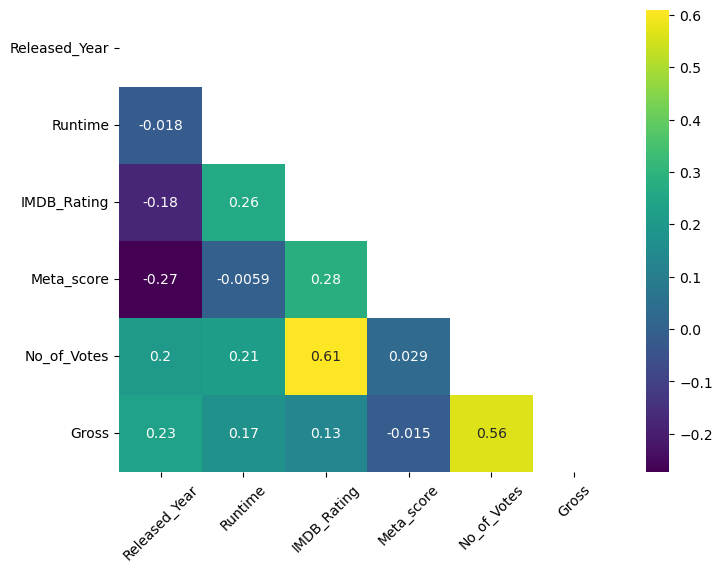

In [ ]:
# Avaliando a correlação da variáveis numéricas com o faturamento 'Gross' através de um heatmap

def heatmap_corr(df, figsize: tuple = (8, 6)):
    corr = df.corr(numeric_only=True)
    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=figsize)

    ax = sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                annot=True,
                cmap='viridis',
                mask=mask)
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

df_cm = df_clean.drop(columns=['Unnamed: 0'])
corr = heatmap_corr(df_cm)

## 14. Exportando o `df_clean` para .csv
- Drop das colunas `key`, `Unnamed: 0`
- Exportação do dataframe limpo para a pasta `../data/processed/data_cleaned.csv`

In [33]:
# Dropando a coluna 'key' e 'Unnamed'
df_clean = df_clean.drop(columns=['key', 'Unnamed: 0'])

# Exportando .csv apartir do df_clean
df_clean.to_csv(r'../data/processed/data_cleaned.csv', index=False)